# Delhi Election Trend Analysis

In [270]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [271]:
## loading the data
delhi_election_df = pd.read_csv(
    "data\Delhi_Assignment.csv"
) # given by competition

delhi_election_2015_df = pd.read_csv(
    "data/delhi-2015-elections.csv"
)
delhi_election_2020_df = pd.read_csv(
    "data/delhi-2020-elections.csv"
)
delhi_election_2015_2_df = pd.read_csv(
    "data/delhi_2015_election_final.csv"
)


In [272]:
delhi_election_df.head()

,Year,Assembly,AAP,Position,Votes,BJP,Position.1,Votes.1,Valid Votes,Total Electors,Turnout Percentage,Margin(M1),Margin(M1) Percentage,Vote Split Amongst Other Candidates(M2),Margin(M1-M2),Margin(M1-M2) Percentage
0,2020,NERELA,SHARAD KUMAR,1,"86,262",NEEL DAMAN KHATRI,2.0,"68,833","165,694","253,982",65.24,"17,429",11%,"10,603","6,826",4%
1,2020,BURARI,SANJEEV JHA,1,"139,598",NaN,NaN,NaN,"222,256","361,703",61.45,NaN,NaN,NaN,NaN,NaN
2,2020,TIMARPUR,DILIP PANDEY,1,"71,432",SURINDER PAL SINGH (BITTOO),2.0,"47,288","124,011","203,599",60.91,"24,144",19%,"5,292","18,852",15%
3,2020,ADARSH NAGAR,PAWAN SHARMA,1,"46,892",RAJ KUMAR BHATIA,2.0,"45,303","103,752","173,416",59.83,"1,589",2%,"11,560","-9,971",-10%
4,2020,BADLI,AJESH YADAV,1,"69,357",VIJAY KUMAR BHAGAT,2.0,"40,234","139,638","219,941",63.49,"29,123",21%,"30,050",-927,-1%


In [273]:
delhi_election_2015_df.head()

,State_Name,Assembly_No,Constituency_No,Year,month,DelimID,Poll_No,Position,Candidate,Sex,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,Delhi,10,1,2015,2,4,0,1,SHARAD KUMAR,M,...,1.0,True,False,False,NaN,NaN,NaN,NaN,NaN,State Assembly Election (AE)
1,Delhi,10,1,2015,2,4,0,2,NEEL DAMAN KHATRI,M,...,1.0,False,True,True,10th Pass,Business,NaN,NaN,NaN,State Assembly Election (AE)
2,Delhi,10,1,2015,2,4,0,3,PRAVEEN KUMAR BHUGRA,M,...,0.0,False,False,False,8th Pass,Business,NaN,Social Work,NaN,State Assembly Election (AE)
3,Delhi,10,1,2015,2,4,0,4,ROOPESH BHARDWAJ,M,...,0.0,False,False,False,10th Pass,Business,Trader,Liberal Profession or Professional,Consultant,State Assembly Election (AE)
4,Delhi,10,1,2015,2,4,0,5,None of the Above,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,State Assembly Election (AE)


In [274]:
delhi_election_2020_df.head()

,State_Name,Assembly_No,Constituency_No,Year,month,DelimID,Poll_No,Position,Candidate,Sex,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,Delhi,11,1,2020,2,4,0,1,SHARAD KUMAR,M,...,2.0,False,True,True,10th Pass,Agriculture,NaN,NaN,NaN,State Assembly Election (AE)
1,Delhi,11,1,2020,2,4,0,2,NEEL DAMAN KHATRI,M,...,1.0,False,False,True,10th Pass,Business,NaN,NaN,NaN,State Assembly Election (AE)
2,Delhi,11,1,2020,2,4,0,3,SIDDHARTH KUNDU,M,...,0.0,False,False,False,Graduate Professional,Business,Rent,Liberal Profession or Professional,Lawyer,State Assembly Election (AE)
3,Delhi,11,1,2020,2,4,0,4,RAJBALA SAINI,F,...,0.0,False,False,False,Post Graduate,Other,Household,NaN,NaN,State Assembly Election (AE)
4,Delhi,11,1,2020,2,4,0,5,MAHENDER CHAUDHARY,M,...,0.0,False,False,False,12th Pass,Other,NaN,NaN,NaN,State Assembly Election (AE)


In [275]:
delhi_election_2015_2_df.head()

,_id,State_Name,Assembly_No,Constituency_No,Year,month,DelimID,Poll_No,Position,Candidate,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,1,Delhi,10,1,2015,2,4,0,1,SHARAD KUMAR,...,1.0,True,False,False,NaN,NaN,NaN,NaN,NaN,State Assembly Election (AE)
1,2,Delhi,10,1,2015,2,4,0,2,NEEL DAMAN KHATRI,...,1.0,False,True,True,10th Pass,Business,NaN,NaN,NaN,State Assembly Election (AE)
2,3,Delhi,10,1,2015,2,4,0,3,PRAVEEN KUMAR BHUGRA,...,0.0,False,False,False,8th Pass,Business,NaN,Social Work,NaN,State Assembly Election (AE)
3,4,Delhi,10,1,2015,2,4,0,4,ROOPESH BHARDWAJ,...,0.0,False,False,False,10th Pass,Business,Trader,Liberal Profession or Professional,Consultant,State Assembly Election (AE)
4,5,Delhi,10,1,2015,2,4,0,5,None of the Above,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,State Assembly Election (AE)


In [276]:
## columns
delhi_election_df.columns

Index(['Year', 'Assembly', 'AAP', 'Position', 'Votes', 'BJP', 'Position.1',
       'Votes.1', 'Valid Votes', 'Total Electors', 'Turnout Percentage',
       'Margin(M1)', 'Margin(M1) Percentage',
       'Vote Split Amongst Other Candidates(M2)', 'Margin(M1-M2)',
       'Margin(M1-M2)  Percentage'],
      dtype='object')

In [277]:
# Renaming columns
delhi_election_df.columns = [
    'Year', 'Assembly', 'AAP', 'position_aap', 'votes_aap', 'BJP', 'position_bjp',
    'votes_bjp', 'Valid Votes', 'Total Electors', 'Turnout Percentage',
    'Margin(M1)', 'Margin(M1) Percentage', 'Vote Split Amongst Other Candidates(M2)',
    'Margin(M1-M2)', 'Margin(M1-M2) Percentage'
]

# Checking the columns name
delhi_election_df.columns = delhi_election_df.columns.str.lower().str.replace(" ", "_")
delhi_election_df.columns

Index(['year', 'assembly', 'aap', 'position_aap', 'votes_aap', 'bjp',
       'position_bjp', 'votes_bjp', 'valid_votes', 'total_electors',
       'turnout_percentage', 'margin(m1)', 'margin(m1)_percentage',
       'vote_split_amongst_other_candidates(m2)', 'margin(m1-m2)',
       'margin(m1-m2)_percentage'],
      dtype='object')

In [278]:
## checking the data

delhi_election_df.groupby(['year'])['assembly'].count()

year
2013    70
2015    70
2020    70
Name: assembly, dtype: int64

In [279]:
## writing a function to create column of the winner Party

delhi_election_df['winner_party'] = delhi_election_df.apply(
    lambda row : 'AAP' if row['position_aap'] == 1 else ('BJP' if row['position_bjp'] == 1 else 'Others')
    , axis = 1
)

## checking the final results
delhi_election_df[delhi_election_df['year'] == 2013][['position_aap', 'position_bjp', 'winner_party']]


,position_aap,position_bjp,winner_party
140,4,1.0,BJP
141,1,2.0,AAP
142,1,2.0,AAP
143,2,1.0,BJP
144,3,2.0,Others
...,...,...,...
205,3,1.0,BJP
206,3,1.0,BJP
207,3,1.0,BJP
208,3,2.0,Others


In [280]:
## checking all combination of winners accross all years
delhi_election_df.groupby(['year', 'winner_party'])['year'].count()

year  winner_party
2013  AAP             28
      BJP             31
      Others          11
2015  AAP             67
      BJP              3
2020  AAP             62
      BJP              8
Name: year, dtype: int64

In [281]:
delhi_election_df

,year,assembly,aap,position_aap,votes_aap,bjp,position_bjp,votes_bjp,valid_votes,total_electors,turnout_percentage,margin(m1),margin(m1)_percentage,vote_split_amongst_other_candidates(m2),margin(m1-m2),margin(m1-m2)_percentage,winner_party
0,2020,NERELA,SHARAD KUMAR,1,"86,262",NEEL DAMAN KHATRI,2.0,"68,833","165,694","253,982",65.24,"17,429",11%,"10,603","6,826",4%,AAP
1,2020,BURARI,SANJEEV JHA,1,"139,598",NaN,NaN,NaN,"222,256","361,703",61.45,NaN,NaN,NaN,NaN,NaN,AAP
2,2020,TIMARPUR,DILIP PANDEY,1,"71,432",SURINDER PAL SINGH (BITTOO),2.0,"47,288","124,011","203,599",60.91,"24,144",19%,"5,292","18,852",15%,AAP
3,2020,ADARSH NAGAR,PAWAN SHARMA,1,"46,892",RAJ KUMAR BHATIA,2.0,"45,303","103,752","173,416",59.83,"1,589",2%,"11,560","-9,971",-10%,AAP
4,2020,BADLI,AJESH YADAV,1,"69,357",VIJAY KUMAR BHAGAT,2.0,"40,234","139,638","219,941",63.49,"29,123",21%,"30,050",-927,-1%,AAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2013,GHONDA,DATARAM,3,"23,621",SAHAB SINGH CHAUHAN,1.0,"47,531","121,098","184,840",65.52,"23,910",20%,"49,955","-26,045",-22%,BJP
206,2013,BABARPUR,GOPAL RAI,3,"25,723",NARESH GAUR,1.0,"34,180","114,976","174,496",65.89,"8,457",7%,"55,072","-46,615",-41%,BJP
207,2013,GOKALPUR,DEVI DAYAL,3,"29,633",RANJEET SINGH,1.0,"34,888","128,054","178,740",71.64,"5,255",4%,"63,528","-58,273",-46%,BJP
208,2013,MUSTAFABAD,KAPIL DHAMA,3,"19,759",JAGDISH PRADHAN,2.0,"54,354","147,082","204,982",71.75,"34,595",24%,"72,962","-38,367",-26%,Others


In [282]:
## converting to numeric

# delhi_election_df['votes_aap'] = pd.to_numeric(delhi_election_df['votes_aap'], errors='coerce')
# delhi_election_df['votes_bjp'] = pd.to_numeric(delhi_election_df['votes_bjp'], errors='coerce')
# delhi_election_df['vote_split_amongst_other_candidates(m2)'] = pd.to_numeric(delhi_election_df['vote_split_amongst_other_candidates(m2)'], errors='coerce')

--------------------------

## EDA 

-------------------------

### Analysing Trends of Vote Share

In [283]:
## visualize the trends of votes in bar chart yoy assemblywise for three winner splits, what I want is to plot the votes of AAP, BJP and Others in each assembly for each year

# Data cleaning: Convert vote columns to numeric, handling errors
for col in ['votes_aap', 'votes_bjp', 'vote_split_amongst_other_candidates(m2)']:
    delhi_election_df[col] = (
        delhi_election_df[col]
        .astype(str)
        .str.replace(',', '')  # Remove commas
        .replace('#VALUE!', '0')  # Replace #VALUE! with 0
        .astype(float)  # Convert to float
    )

# Fill missing values with 0 for simplicity
delhi_election_df.fillna(0, inplace=True)

# Melt the data for easier plotting
data_melted = delhi_election_df.melt(
    id_vars=['year', 'assembly'], 
    value_vars=['votes_aap', 'votes_bjp', 'vote_split_amongst_other_candidates(m2)'],
    var_name='party', 
    value_name='votes'
)

# Map party names
party_mapping = {
    'votes_aap': 'AAP',
    'votes_bjp': 'BJP',
    'vote_split_amongst_other_candidates(m2)': 'Others'
}
data_melted['party'] = data_melted['party'].map(party_mapping)

# Create a dropdown-based interactive plot
def create_plot(selected_assembly):
    # Filter data for the selected assembly
    filtered_data = data_melted[data_melted['assembly'] == selected_assembly]
    
    # Create the bar plot
    fig = px.bar(
        filtered_data,
        x='year',
        y='votes',
        color='party',
        barmode='group',
        text='votes',
        labels={'votes': 'Votes', 'year': 'Year', 'party': 'Party'},
        title=f"Votes Distribution for Assembly: {selected_assembly}"
    )
    
    # Update layout for better visuals
    fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig.update_layout(
        xaxis=dict(title="Year", tickvals=[2013, 2015, 2020]),
        yaxis=dict(title="Votes"),
        barmode='group',
        height=600,
        width=900,
        legend_title="Party"
    )
    return fig

# # Default plot for the first assembly
assembly_list = sorted(delhi_election_df['assembly'].unique())
# default_assembly = assembly_list[0]
# fig = create_plot(default_assembly)

# Display dropdown to select assembly
from ipywidgets import interact
interact(lambda assembly: create_plot(assembly).show(), assembly=assembly_list)

interactive(children=(Dropdown(description='assembly', options=('ADARSH NAGAR', 'AMBEDKAR NAGAR', 'BABARPUR', …

<function __main__.<lambda>(assembly)>

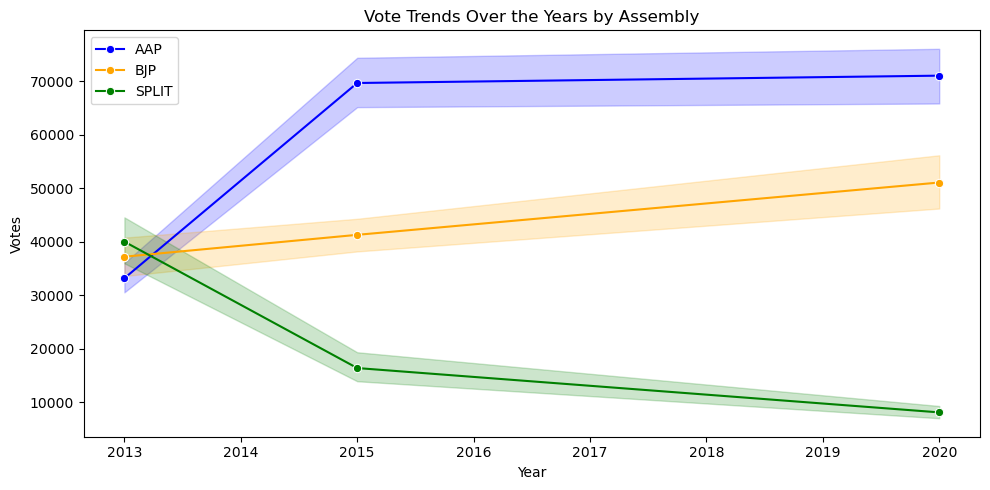

In [284]:
## Line Chart for Vote Trends Over the Years
def plot_line_chart():
    plt.figure(figsize=(10, 5))

    for party, color in zip(['votes_aap', 'votes_bjp', 'vote_split_amongst_other_candidates(m2)'], ['blue', 'orange', 'green']):
        sns.lineplot(data=delhi_election_df, x='year', y=party, marker='o', label=party.split('_')[1].upper(), color=color)

    plt.xlabel('Year')
    plt.ylabel('Votes')
    plt.title('Vote Trends Over the Years by Assembly')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Line chart for vote trends
plot_line_chart()


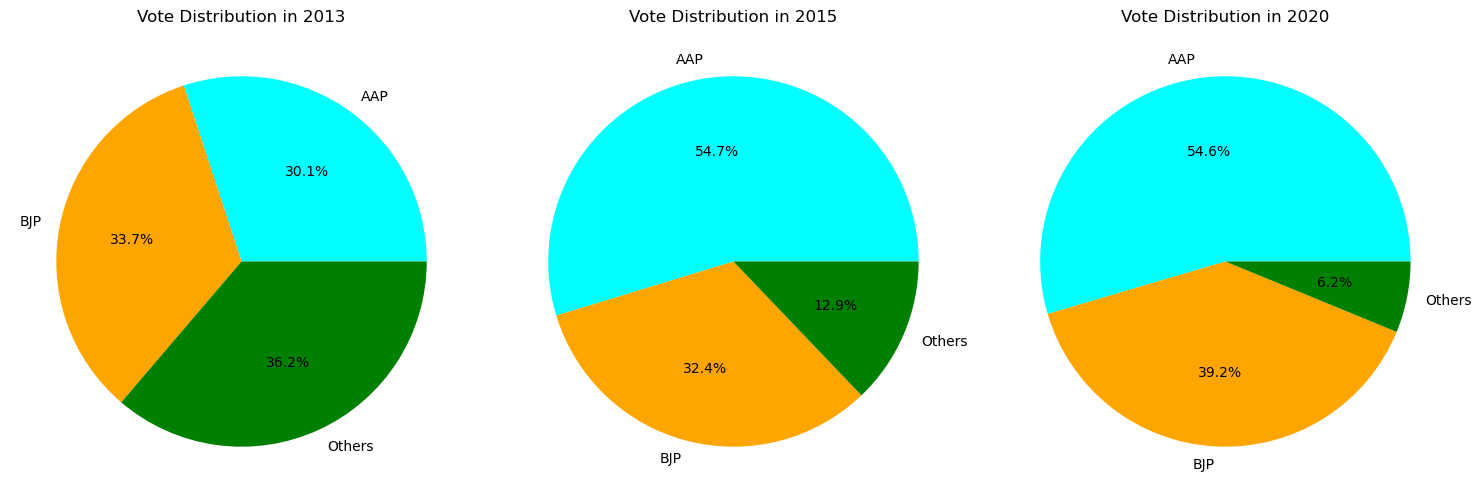

In [285]:
## Pie Chart for Vote Distribution in a Specific Year

def plot_pie_charts_for_multiple_years(years):
    plt.figure(figsize=(15, 5))
    
    # Loop through the years and plot a pie chart for each
    for i, year in enumerate(years, 1):
        filtered_data = delhi_election_df[delhi_election_df['year'] == year]
        if filtered_data.empty:
            print(f"No data found for year: {year}")
            continue

        aggregated_votes = filtered_data[['votes_aap', 'votes_bjp', 'vote_split_amongst_other_candidates(m2)']].sum()

        plt.subplot(1, 3, i)  # 1 row, 3 columns, i-th subplot
        plt.pie(aggregated_votes, labels=['AAP', 'BJP', 'Others'], autopct='%1.1f%%', colors=['cyan', 'orange', 'green'])
        plt.title(f'Vote Distribution in {year}')

    plt.tight_layout()
    plt.show()

# Plot pie charts for years 2013, 2015, and 2020
plot_pie_charts_for_multiple_years([2013, 2015, 2020])


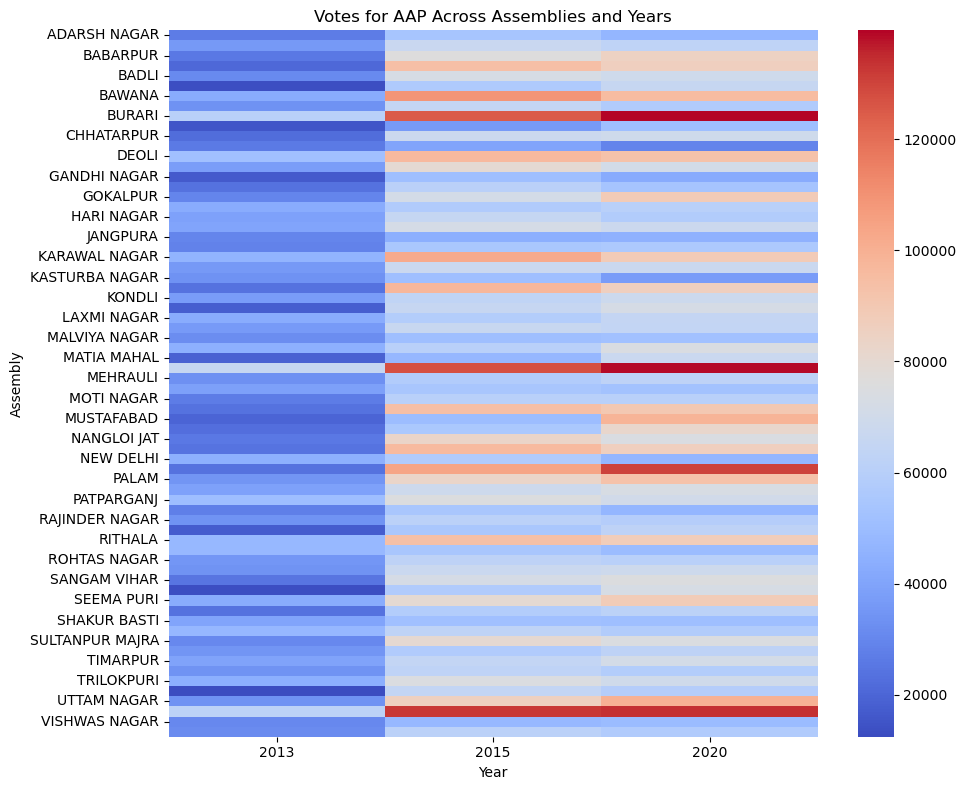

In [286]:
## Heatmap for Turnout Percentage Across Assemblies and Years
def plot_heatmap():
    # Correcting the pivot function usage
    pivot_data = delhi_election_df.pivot(index='assembly', columns='year', values='votes_aap')  # 'votes_aap' as the metric for heatmap

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_data, annot=False, fmt='.0f', cmap='coolwarm')
    plt.title('Votes for AAP Across Assemblies and Years')
    plt.xlabel('Year')
    plt.ylabel('Assembly')
    plt.tight_layout()
    plt.show()

# Heatmap for votes for AAP
plot_heatmap()

In [287]:
## Scatter Plot to Analyze Vote Margins

def plot_scatter_plot_with_year_filter():
    # Creating the scatter plot with an option to filter by year
    fig = px.scatter(delhi_election_df, 
                     x='votes_aap', 
                     y='votes_bjp', 
                     color='assembly', 
                     size='vote_split_amongst_other_candidates(m2)', 
                     hover_name='assembly', 
                     title='Scatter Plot: AAP vs BJP Votes with Other Votes as Size',
                     labels={'votes_aap': 'Votes for AAP', 'votes_bjp': 'Votes for BJP'},
                     template='plotly',
                     color_continuous_scale='Viridis', 
                     animation_frame='year')  # Adding year as an animation frame

    # Customizing layout
    fig.update_layout(
        showlegend=True,
        updatemenus=[dict(
            type='dropdown',
            buttons=[
                dict(
                    label='All Years',
                    method='relayout',
                    args=['xaxis.range', [delhi_election_df['votes_aap'].min(), delhi_election_df['votes_bjp'].max()]]
                ),
                *[
                    dict(
                        label=str(year),
                        method='relayout',
                        args=['xaxis.range', [delhi_election_df[delhi_election_df['year'] == year]['votes_aap'].min(), 
                                              delhi_election_df[delhi_election_df['year'] == year]['votes_bjp'].max()]]
                    ) for year in delhi_election_df['year'].unique()
                ]
            ],
            showactive=True,
            x=0.17,
            y=1.15
        )]
    )
    fig.show()

# Scatter plot for AAP vs BJP with year filter
plot_scatter_plot_with_year_filter()

In [288]:
delhi_election_df.columns

Index(['year', 'assembly', 'aap', 'position_aap', 'votes_aap', 'bjp',
       'position_bjp', 'votes_bjp', 'valid_votes', 'total_electors',
       'turnout_percentage', 'margin(m1)', 'margin(m1)_percentage',
       'vote_split_amongst_other_candidates(m2)', 'margin(m1-m2)',
       'margin(m1-m2)_percentage', 'winner_party'],
      dtype='object')

#### Preparing the data for Model

In [289]:
# Convert relevant columns to the appropriate data types
delhi_election_df['valid_votes'] = delhi_election_df['valid_votes'].str.replace(',', '').astype(int)
delhi_election_df['total_electors'] = delhi_election_df['total_electors'].str.replace(',', '').astype(int)
delhi_election_df['margin(m1)'] = pd.to_numeric(delhi_election_df['margin(m1)'].str.replace(',', '').replace("#VALUE!", ""), errors='coerce')
delhi_election_df['margin(m1)_percentage'] = pd.to_numeric(delhi_election_df['margin(m1)_percentage'].str.replace('%', '').replace("#VALUE!", ""), errors='coerce')
delhi_election_df['margin(m1-m2)'] = pd.to_numeric(delhi_election_df['margin(m1-m2)'].str.replace(',', '').replace("#VALUE!", ""), errors='coerce')
delhi_election_df['margin(m1-m2)_percentage'] = pd.to_numeric(delhi_election_df['margin(m1-m2)_percentage'].str.replace('%', '').replace("#VALUE!", ""), errors='coerce')

In [290]:
delhi_election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     210 non-null    int64  
 1   assembly                                 210 non-null    object 
 2   aap                                      210 non-null    object 
 3   position_aap                             210 non-null    int64  
 4   votes_aap                                210 non-null    float64
 5   bjp                                      210 non-null    object 
 6   position_bjp                             210 non-null    float64
 7   votes_bjp                                210 non-null    float64
 8   valid_votes                              210 non-null    int32  
 9   total_electors                           210 non-null    int32  
 10  turnout_percentage                       210 non-n

In [291]:
## considering only important features
delhi_elec_df = delhi_election_df[['year', 'assembly', 'valid_votes', 'total_electors', 'turnout_percentage', 'margin(m1)', 'margin(m1-m2)', 'margin(m1-m2)_percentage', 'winner_party']]

## change dtypes

## checking the data
delhi_elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      210 non-null    int64  
 1   assembly                  210 non-null    object 
 2   valid_votes               210 non-null    int32  
 3   total_electors            210 non-null    int32  
 4   turnout_percentage        210 non-null    float64
 5   margin(m1)                204 non-null    float64
 6   margin(m1-m2)             204 non-null    float64
 7   margin(m1-m2)_percentage  204 non-null    float64
 8   winner_party              210 non-null    object 
dtypes: float64(4), int32(2), int64(1), object(2)
memory usage: 13.3+ KB


In [292]:
## looking into the data
delhi_elec_df.describe()

,year,valid_votes,total_electors,turnout_percentage,margin(m1),margin(m1-m2),margin(m1-m2)_percentage
count,210.000000,210.000000,210.000000,210.000000,204.000000,204.000000,204.000000
mean,2016.000000,124464.600000,190703.071429,65.514000,20079.308824,-2043.901961,-2.598039
std,2.950955,32791.507445,52955.464759,4.069579,15447.388571,25578.183780,21.012199
min,2013.000000,58926.000000,106559.000000,45.430000,101.000000,-90674.000000,-66.000000
25%,2013.000000,103126.500000,155774.000000,63.052500,8190.500000,-20578.500000,-20.250000
50%,2015.000000,116734.500000,178002.500000,65.955000,16880.000000,2815.000000,2.500000
75%,2020.000000,140109.750000,213805.000000,68.095000,29285.000000,14680.750000,11.250000
max,2020.000000,261315.000000,424924.000000,74.190000,77665.000000,63299.000000,52.000000


In [293]:
# delhi_elec_df.sample(100)

-----------------------

### preprocessing 

--------------------------

In [294]:
# Normalization of Numerical Columns (Except year)

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select numerical columns (except year)
numerical_cols = delhi_elec_df.select_dtypes(include=['int', 'float64']).columns.drop('year')

# Normalize the numerical columns
delhi_elec_df[numerical_cols] = scaler.fit_transform(delhi_elec_df[numerical_cols])

# Display the normalized data
delhi_elec_df.sample(5)

,year,assembly,valid_votes,total_electors,turnout_percentage,margin(m1),margin(m1-m2),margin(m1-m2)_percentage,winner_party
3,2020,ADARSH NAGAR,-0.633155,-0.327226,-1.400042,-1.199931,-0.310679,-0.353136,AAP
121,2015,TUGHLAKABAD,-0.654400,-0.669631,0.205918,0.883981,1.081970,1.316660,AAP
131,2015,SHAHDARA,-0.189788,-0.392663,1.001508,-0.541764,0.032643,0.076240,AAP
192,2013,BADARPUR,0.244408,0.296747,-0.328581,0.287595,-1.556827,-1.402723,BJP
195,2013,KONDLI,-0.506540,-0.593839,0.543366,-0.816985,-1.259203,-1.402723,AAP


In [295]:
## Encoding Categorical Variables (assembly and winner_party)

from sklearn.preprocessing import LabelEncoder

# Separate LabelEncoders for each column
assembly_encoder = LabelEncoder()
winner_party_encoder = LabelEncoder()

# Fit the encoders and encode the columns
delhi_elec_df['assembly'] = assembly_encoder.fit_transform(delhi_elec_df['assembly'])
delhi_elec_df['winner_party'] = winner_party_encoder.fit_transform(delhi_elec_df['winner_party'])

# Display the encoded data
delhi_elec_df.sample(5)

,year,assembly,valid_votes,total_electors,turnout_percentage,margin(m1),margin(m1-m2),margin(m1-m2)_percentage,winner_party
94,2015,36,-0.339452,-0.525241,0.999045,-0.315281,0.357506,0.410199,0
150,2013,40,0.345437,0.566598,-0.981310,0.754515,-0.737401,-0.591679,1
190,2013,21,-1.027214,-0.883868,-0.597062,-1.170403,-1.075628,-1.402723,1
203,2013,52,-0.113367,-0.289500,0.819236,-0.333321,-0.739792,-0.687096,1
81,2015,31,0.137418,-0.222662,1.614827,0.815452,-0.229277,-0.162302,0


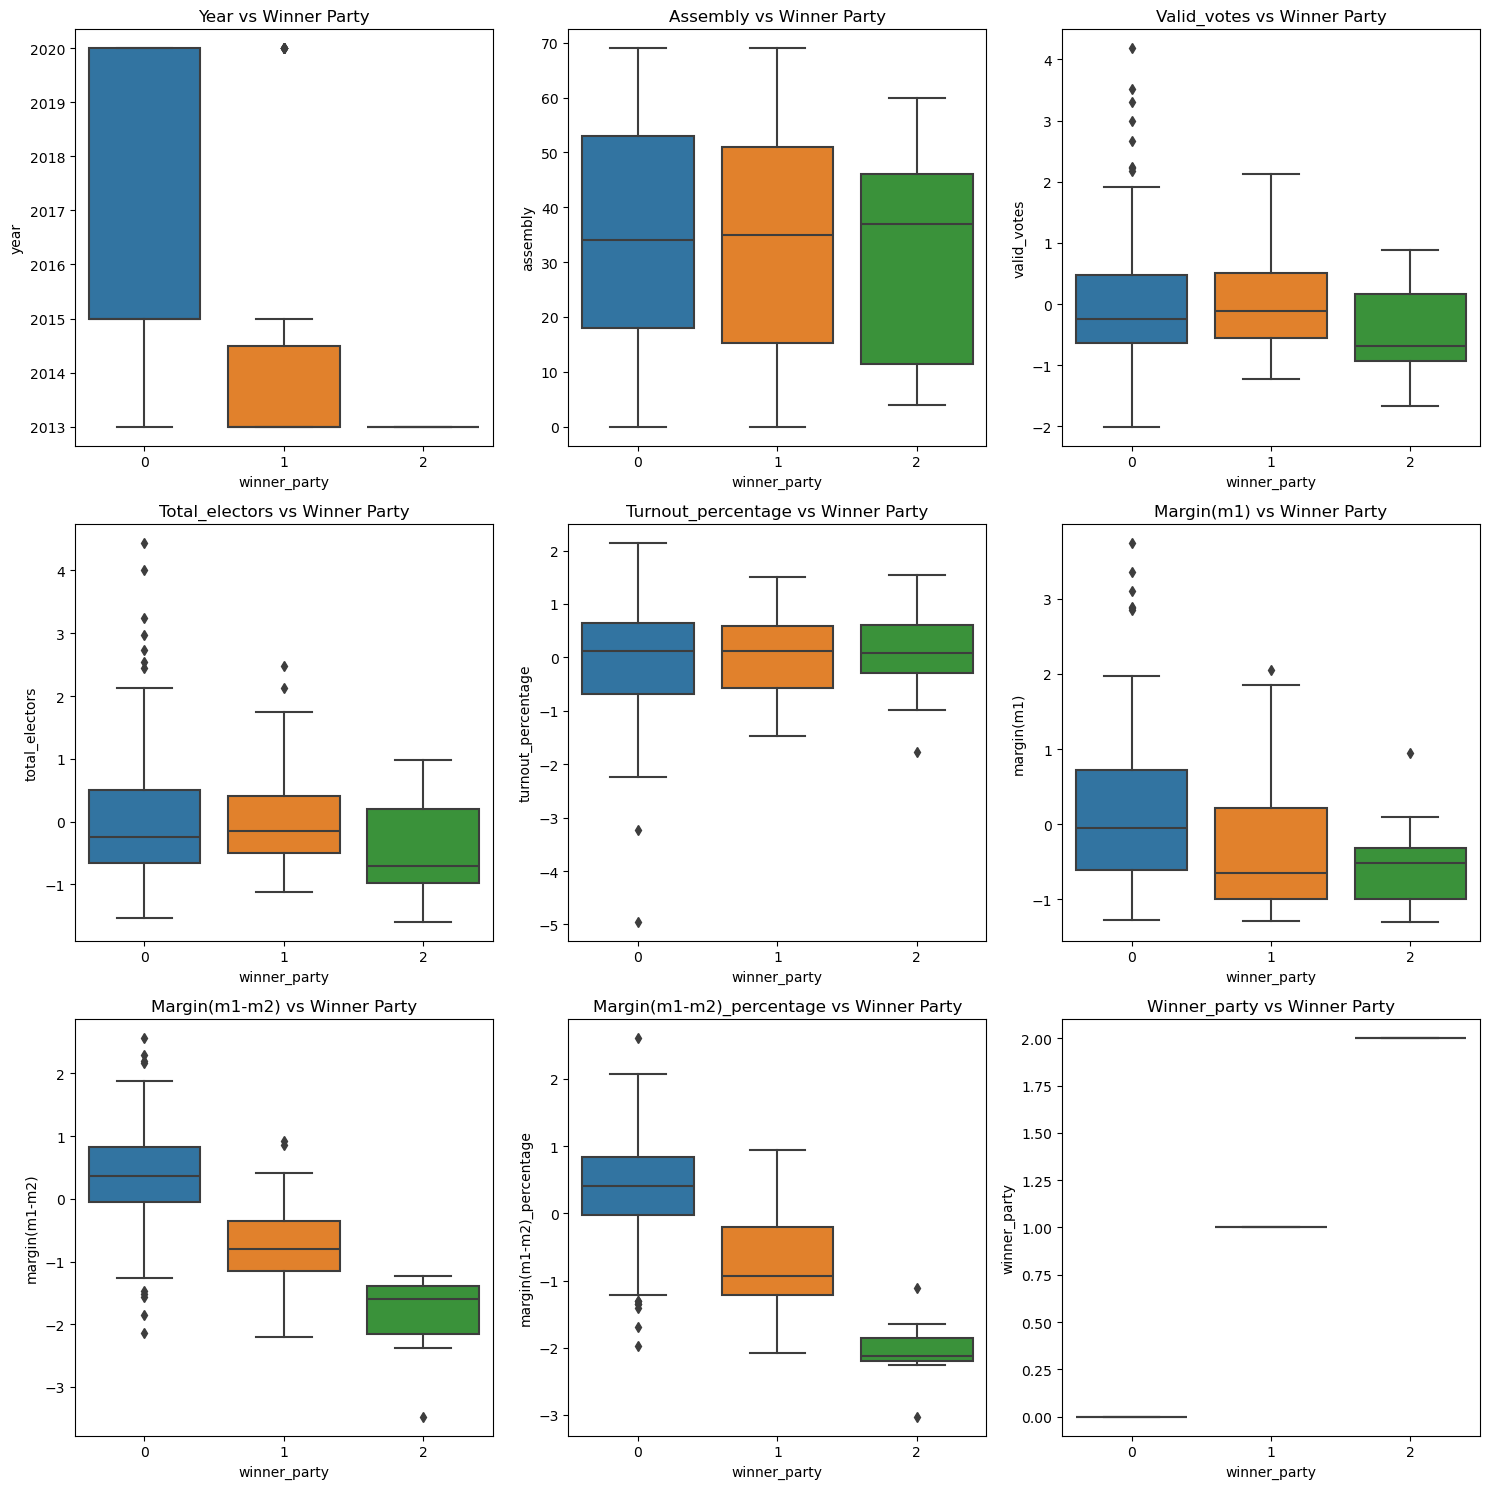

In [296]:
## Relationship between Features and Target, winner_party

numerical_cols = delhi_elec_df.select_dtypes(include=['int', 'float64']).columns

# Calculate the number of rows and columns needed for the subplots
num_plots = len(numerical_cols)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Rounding up if there are leftover columns
num_cols = min(3, num_plots)  # Maximum 3 columns per row

# Plotting the relationship between features and target variable
plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='winner_party', y=col, data=delhi_elec_df)
    plt.title(f'{col.capitalize()} vs Winner Party')

# Display the plot
plt.tight_layout()
plt.show()

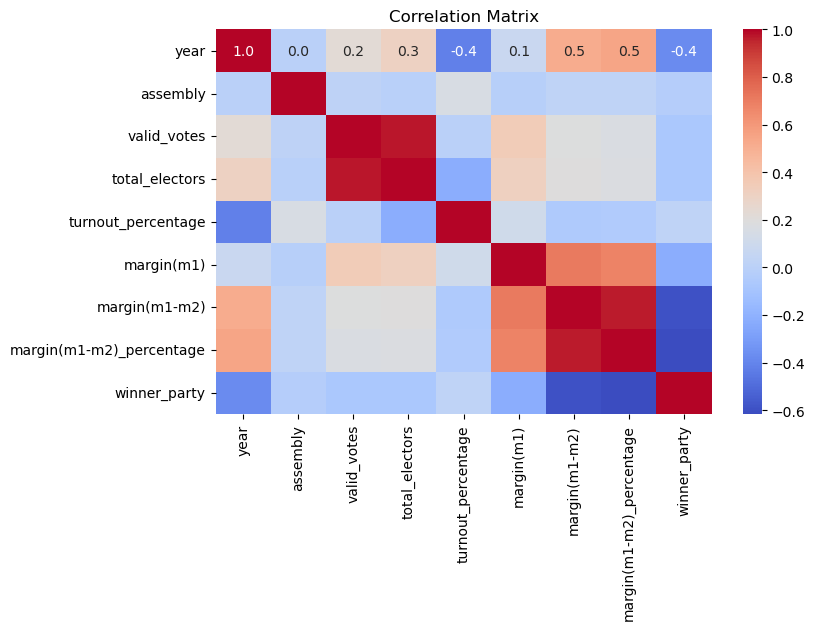

In [297]:
# Calculate the correlation matrix
correlation_matrix = delhi_elec_df.corr()

# Display the correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

In [298]:
# Identify highly correlated features (threshold > 0.8)
high_correlation_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs > 0.8]
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs < 1]  # Exclude self-correlation

# Display highly correlated pairs
print("Highly correlated pairs (threshold > 0.8):")
print(high_correlation_pairs)

Highly correlated pairs (threshold > 0.8):
valid_votes    total_electors              0.974464
margin(m1-m2)  margin(m1-m2)_percentage    0.968368
dtype: float64


In [299]:
# Drop one feature from each pair of highly correlated features
features_to_drop = set()
for pair in high_correlation_pairs.index:
    features_to_drop.add(pair[1])  # Add the second feature of the pair to the drop list

# Drop the identified features from the dataframe
delhi_elec_df_reduced = delhi_elec_df.drop(columns=features_to_drop)

# Display the remaining features
print("Remaining features after removing multicollinearity:")
print(delhi_elec_df_reduced.columns)

Remaining features after removing multicollinearity:
Index(['year', 'assembly', 'valid_votes', 'turnout_percentage', 'margin(m1)',
       'margin(m1-m2)', 'winner_party'],
      dtype='object')


In [300]:
## checking with Gini Impurity Index for feature selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import numpy as np

# Function to calculate Gini Impurity for the target variable
def calculate_gini_impurity(X, y):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=1)  # Decision Tree with one split (max depth = 1)
    clf.fit(X, y)
    return clf.score(X, y)


In [301]:
# Separate features and target variable
X = delhi_elec_df.drop(columns=['winner_party'])
y = delhi_elec_df['winner_party']

X.shape, y.shape

((210, 8), (210,))

In [302]:
# Calculate Gini Impurity before removing columns
gini_before = calculate_gini_impurity(X, y)
print(f'Gini Impurity before removing columns: {gini_before}')

# Remove columns with high correlation
X_reduced = X.drop(columns=features_to_drop)

# Calculate Gini Impurity after removing columns
gini_after = calculate_gini_impurity(X_reduced, y)
print(f'Gini Impurity after removing columns: {gini_after}')

# Compare the results
if gini_before > gini_after:
    print("Removing the columns reduced variability.")
else:
    print("Removing the columns did not reduce variability.")

Gini Impurity before removing columns: 0.7619047619047619
Gini Impurity after removing columns: 0.7619047619047619
Removing the columns did not reduce variability.


In [303]:
# ## Trying to find the best features using Gini Impurity Index

# clf = DecisionTreeClassifier(criterion='gini', max_depth=9)
# clf.fit(X, y)

# # Get feature importance
# feature_importance = clf.feature_importances_
# importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
# importance_df = importance_df.sort_values(by='Importance', ascending=False)
# print(importance_df)

**Steps Overview:**

* `Split Data`: Divide the data into training, validation, and test sets.
* `Build Models`: Train multiple models (LogisticRegression, DecisionTreeClassifier, LGBMClassifier, AdaBoostClassifier, RandomForestClassifier).
* `Hyperparameter Optimization`: Use GridSearchCV or RandomizedSearchCV for hyperparameter tuning.
* `Evaluate and Compare Models`: Evaluate all models on the validation set and select the best-performing one.
* `Test the Final Model`: Once the best model is selected, evaluate it on the test set.

In [304]:
## import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [305]:
# Split the data into train, validation, and test sets
X = delhi_elec_df.drop(columns=['winner_party'])
y = delhi_elec_df['winner_party']

# Split into 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [306]:
# Define the models and their hyperparameters for GridSearchCV
param_grid = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'classifier__max_depth': [5, 10, 15, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_depth': [5, 10, 15],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1]
    },
    'LGBM': {
        'classifier__num_leaves': [31, 50, 100],
        'classifier__learning_rate': [0.01, 0.1, 0.5],
        'classifier__n_estimators': [50, 100, 200]
    },
    'Naive Bayes': {
        'classifier__var_smoothing': [1e-10, 1e-9, 1e-8]  # Hyperparameter for smoothing
    }
}

# Initialize the classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LGBM': lgb.LGBMClassifier(),
    'Naive Bayes': GaussianNB()
}

# Initialize the best accuracy variable
best_accuracy = 0
best_model = None

# Perform Grid Search for each model
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    # Create a pipeline with SimpleImputer and the classifier
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('classifier', model)
    ])
    
    # GridSearchCV with imputation
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Evaluate on validation set
    val_predictions = grid_search.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    
    print(f"{model_name} Validation Accuracy: {val_accuracy}")
    print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    
    # Update the best model
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = grid_search.best_estimator_

Running GridSearchCV for Logistic Regression...
Logistic Regression Validation Accuracy: 0.7857142857142857
Best Hyperparameters for Logistic Regression: {'classifier__C': 1, 'classifier__solver': 'liblinear'}
Running GridSearchCV for Decision Tree...
Decision Tree Validation Accuracy: 0.8095238095238095
Best Hyperparameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Running GridSearchCV for Random Forest...
Random Forest Validation Accuracy: 0.8095238095238095
Best Hyperparameters for Random Forest: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Running GridSearchCV for AdaBoost...
AdaBoost Validation Accuracy: 0.8095238095238095
Best Hyperparameters for AdaBoost: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}
Running GridSearchCV for LGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_col_wise=

In [307]:
# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest accuracy of best model ({best_model.__class__.__name__}): {test_accuracy:.4f}")


Test accuracy of best model (Pipeline): 0.7381


-------

### Saving the Model

--------

In [308]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

------

### Loading the Model and Making Predictions

-------

In [309]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Make predictions on the test set
y_test_pred = loaded_model.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy of the best model ({loaded_model.__class__.__name__}): {test_accuracy:.4f}")

Test accuracy of the best model (Pipeline): 0.7381


-----

### Classification Matrix

----

In [310]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.43      0.33      0.38         9
           2       0.50      0.33      0.40         3

    accuracy                           0.74        42
   macro avg       0.58      0.52      0.54        42
weighted avg       0.71      0.74      0.72        42

Confusion Matrix:
 [[27  3  0]
 [ 5  3  1]
 [ 1  1  1]]


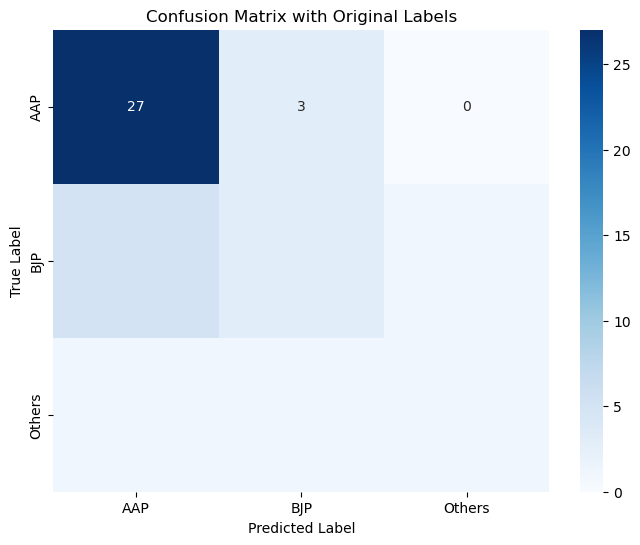

In [311]:
# Get the original class names from the label encoder
original_labels = winner_party_encoder.inverse_transform(best_model.classes_)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix with original class names
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=original_labels, yticklabels=original_labels)
plt.title('Confusion Matrix with Original Labels')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [312]:
# ## Plotting the confusion matrix with the predicted labels

# # Generate confusion matrix
# cm = confusion_matrix(y_test, y_test_pred)

# plt.figure(figsize=(8,5))
# im = plt.imshow(cm, interpolation='nearest', cmap='Blues')
# plt.colorbar()

# # Add text annotations to every cell
# for i in range(cm.shape[0]):
#     for j in range(cm.shape[1]):
#         plt.text(j, i, str(cm[i, j]),
#                 ha="center", va="center",
#                 color="white" if cm[i, j] > cm.max()/2 else "black",
#                 fontsize=12, fontweight='bold')

# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.tight_layout()
# plt.show()

-----

### Saving the Model

------

In [313]:
joblib.dump(best_model, 'best_model.pkl')  # Save model
joblib.dump(assembly_encoder, 'assembly_encoder.pkl')  # Save label encoder
joblib.dump(winner_party_encoder, 'winner_party_encoder.pkl')  # Save label encoder

['winner_party_encoder.pkl']